# **1. Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# **2. Prepare data**

In [2]:
df = pd.read_csv('/content/Customer Survey.csv')
df.head(5)

,Unnamed: 0,ประทับเวลา,Record,Bike,Collagen,Browni,Mae-Khong,Botox,Marijuana,Hemp,Pressure Gauge,Bulb,Bikini Wax,Massage Chair,Plant,Bolster,Weighter,Botox Course,Sang-som,Curry Puff,Lego,Fan,Yadong,Pyjamas,Dumbell,Robotic Vacuum Cleaner,Wagyu Beef,Sun Dried Pork,Drone,Food Waste Digester,A see-through shirt,Gypsy Card,Grilled Beef,Paper Shredder,Bag,Shabu,Surfskate,Board game,Dog Costume,Omakase,Cashew Nut,Smart Light Bulbs,Hair Clipper,Dyson Hair Dryer,Record.1,Nose Hair Scissors,PS 5,Fasting Blood Sugar Meter,Roti,Pickled Cabbage,Dog,Thai Travel Package,FIFA Online Game,Light Mango,Automatic Cat Toilet,Chanel Bag,Stewed Pork Leg on Rice,Cordyceps,Pillow for Health,Cat Food,Dido,Software,Sunscreen
0,20-03-21,11:53:45,1,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,20-03-21,11:54:01,2,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,20-03-21,11:54:05,3,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,20-03-21,11:54:13,4,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,20-03-21,11:54:18,5,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [3]:
df = df.iloc[:, 3:]
df.dropna(inplace=True)
df.replace({'เคย':1, 'ไม่เคย':0}, inplace=True)

df.head(5)

,Bike,Collagen,Browni,Mae-Khong,Botox,Marijuana,Hemp,Pressure Gauge,Bulb,Bikini Wax,Massage Chair,Plant,Bolster,Weighter,Botox Course,Sang-som,Curry Puff,Lego,Fan,Yadong,Pyjamas,Dumbell,Robotic Vacuum Cleaner,Wagyu Beef,Sun Dried Pork,Drone,Food Waste Digester,A see-through shirt,Gypsy Card,Grilled Beef,Paper Shredder,Bag,Shabu,Surfskate,Board game,Dog Costume,Omakase,Cashew Nut,Smart Light Bulbs,Hair Clipper,Dyson Hair Dryer,Record.1,Nose Hair Scissors,PS 5,Fasting Blood Sugar Meter,Roti,Pickled Cabbage,Dog,Thai Travel Package,FIFA Online Game,Light Mango,Automatic Cat Toilet,Chanel Bag,Stewed Pork Leg on Rice,Cordyceps,Pillow for Health,Cat Food,Dido,Software,Sunscreen
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,1


# **3. Conduct EDA**

In [4]:
df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sunscreen,40.0,1.000,0.000000,1.0,1.0,1.0,1.00,1.0
Bag,40.0,1.000,0.000000,1.0,1.0,1.0,1.00,1.0
Shabu,40.0,1.000,0.000000,1.0,1.0,1.0,1.00,1.0
Roti,40.0,0.975,0.158114,0.0,1.0,1.0,1.00,1.0
Curry Puff,40.0,0.950,0.220721,0.0,1.0,1.0,1.00,1.0
Cashew Nut,40.0,0.900,0.303822,0.0,1.0,1.0,1.00,1.0
Bolster,40.0,0.875,0.334932,0.0,1.0,1.0,1.00,1.0
Fan,40.0,0.825,0.384808,0.0,1.0,1.0,1.00,1.0
Software,40.0,0.800,0.405096,0.0,1.0,1.0,1.00,1.0
Sun Dried Pork,40.0,0.800,0.405096,0.0,1.0,1.0,1.00,1.0


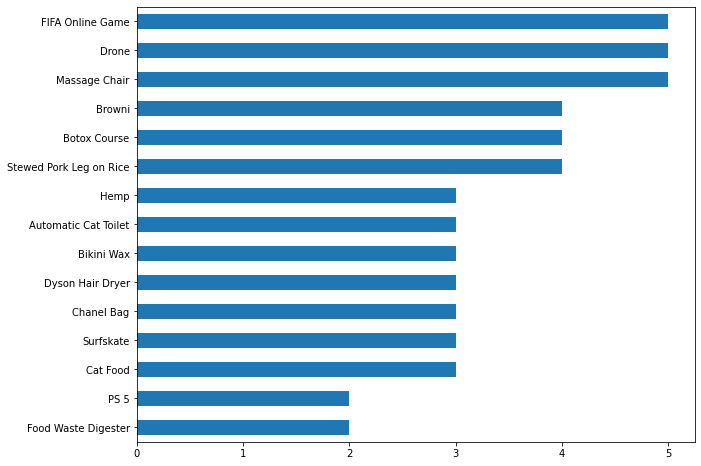

In [5]:
plt.figure(figsize=(10, 8))
df.sum(axis=0).sort_values(ascending=False).tail(15).plot(kind='barh').invert_yaxis()

# **4. Conduct Market Basket Analysis**

In [10]:
freq_itemsets = apriori(df, min_support=0.5, use_colnames=True)
freq_itemsets.head(10)

,support,itemsets
0,0.525,(Collagen)
1,0.675,(Plant)
2,0.875,(Bolster)
3,0.675,(Weighter)
4,0.950,(Curry Puff)
5,0.625,(Lego)
6,0.825,(Fan)
7,0.600,(Dumbell)
8,0.525,(Robotic Vacuum Cleaner)
9,0.675,(Wagyu Beef)


In [11]:
rule = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rule.sort_values('lift',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
320692,"(Wagyu Beef, Bag, Fan, Roti)","(Curry Puff, Grilled Beef, Cashew Nut, Software)",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
396332,"(Sunscreen, Wagyu Beef, Bag, Fan)","(Curry Puff, Grilled Beef, Shabu, Cashew Nut, ...",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
380038,"(Wagyu Beef, Fan, Bag, Shabu)","(Curry Puff, Grilled Beef, Cashew Nut, Softwar...",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
380042,"(Sunscreen, Wagyu Beef, Bag, Fan)","(Curry Puff, Grilled Beef, Shabu, Cashew Nut, ...",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
380044,"(Curry Puff, Grilled Beef, Cashew Nut, Software)","(Wagyu Beef, Shabu, Sunscreen, Bag, Fan)",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333


# **5. Visualize the result**

In [12]:
simple_rule = rule[(rule['antecedents'].apply(len) == 1) & (rule['consequents'].apply(len) == 1) & (rule['lift'] >= 1.05) & (rule['confidence'] >= 0.5)]
simple_rule.loc[:, 'antecedents'] = simple_rule.loc[:, 'antecedents'].apply(lambda x: list(x)[0]).astype('unicode')
simple_rule.loc[:, 'consequents'] = simple_rule.loc[:, 'consequents'].apply(lambda x: list(x)[0]).astype('unicode')
simple_rule.loc[:, 'lift'] = simple_rule.loc[:, 'lift'].round(3)
simple_rule.sort_values('lift', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,Wagyu Beef,Grilled Beef,0.675,0.725,0.650,0.962963,1.328,0.160625,7.425000
157,Grilled Beef,Wagyu Beef,0.725,0.675,0.650,0.896552,1.328,0.160625,3.141667
17,Lego,Plant,0.625,0.675,0.525,0.840000,1.244,0.103125,2.031250
16,Plant,Lego,0.675,0.625,0.525,0.777778,1.244,0.103125,1.687500
70,Weighter,Board game,0.675,0.650,0.500,0.740741,1.140,0.061250,1.350000
71,Board game,Weighter,0.650,0.675,0.500,0.769231,1.140,0.061250,1.408333
25,Grilled Beef,Plant,0.725,0.675,0.550,0.758621,1.124,0.060625,1.346429
24,Plant,Grilled Beef,0.675,0.725,0.550,0.814815,1.124,0.060625,1.485000
155,Sun Dried Pork,Wagyu Beef,0.800,0.675,0.600,0.750000,1.111,0.060000,1.300000
154,Wagyu Beef,Sun Dried Pork,0.675,0.800,0.600,0.888889,1.111,0.060000,1.800000


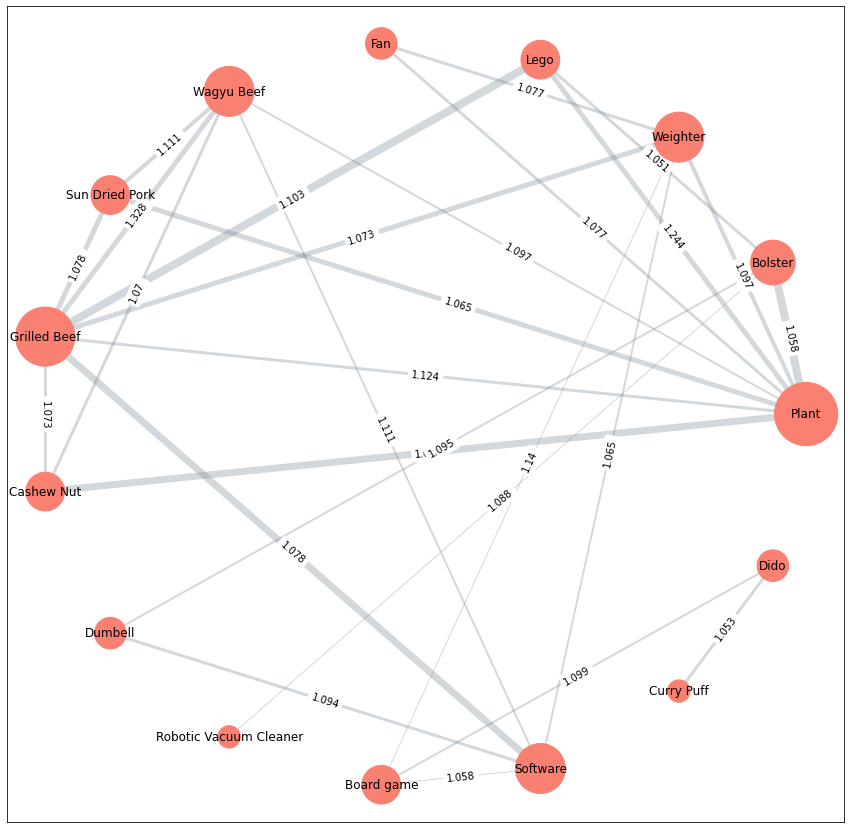

In [13]:
plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(simple_rules, source='antecedents', target='consequents', edge_attr='lift')
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=dict(G.degree).keys(), node_size=[s*500 for s in dict(G.degree).values()], node_color='salmon')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=[w for w in dict(G.degree).values()], edge_color='slategray')
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'lift'))

plt.show()